<font size="5">**Predicting the Quality of Wine**</font>

**By Project Group 25 (Natalia Garcia-Arias, Marta Halasz, Kevin Meng, and Sara Trnovska)**

<font size="3">**Introduction**</font>

Drinking wine is an enjoyable pastime that many indulge in. To ensure customer satisfaction, it is of utmost importance for wine manufacturers to check the quality of their wine. Wine certification is normally done with the help of physicochemical tests revealing the wine’s physicochemical composition and sensory tests showing subjective assessments of wine quality (Nebot, Mugica, and Escobet, 2015, p. 501). An efficient prediction model based physicochemical variables that have a strong relationship with wine quality would greatly facilitate the certification process by eliminating the need for taste testers. The wine data used in this project was collected from May 2004 to February 2007 for red and white variants of the Portuguese Vinho Verde wine by the University of Minho in Guimaraes, Portugal and was taken from the UCI Machine Learning Repository. The data consists of results of physicochemical tests of wine samples as well as sensory assessments of the wine quality by taste testers who graded the quality of the wine on a scale of one to ten. A list of all of the variables in the dataset is shown below (Nebot, Mugica, and Escobet, 2015, p. 504):
* Fixed acidity (g(tartaric acid)/dm<sup>3</sup>)
* Volatile acidity (g(acetic acid)/dm<sup>3</sup>)
* Citric acid (g/dm<sup>3</sup>)
* Residual sugar (g/dm<sup>3</sup>)
* Chlorides (g(sodium chloride)/dm<sup>3</sup>)
* Free sulfur dioxide (mg/dm<sup>3</sup>)
* Total sulfur dioxide (mg/dm<sup>3</sup>)
* Density (g/dm<sup>3</sup>)
* pH
* Sulfates (g(potassium sulfate)/dm<sup>3</sup>)
* Alcohol (%vol)
* Quality

Later in the proposal, it was found that alcohol, density, chlorides, and volatile acidity were the strongest predictors for wine quality. Knowing this as well as the physicochemical composition of the wine samples and the sensory assessment of the samples, our project aims to answer the following question: how do alcohol, density, chlorides, and volatile acidity predict the quality of the wine? 


<font size="3">**Preliminary Exploratory Data Analysis**</font>

First, we loaded all of the packages needed for our preliminary data analysis (tidyverse, repr, tidymodels, and cowplot).

In [2]:
#loading packages
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Next, we loaded the data for red and white wine into R using the read_delim function, assigned column names to all of the columns in the dataset, and combined the data into one dataframe.

In [3]:
#read red wine data, assign wine-type label and new column names
red_wine_data <- read_delim("winequality-red (1).csv", delim = ";")%>%
                    mutate(quality = quality)%>%
                    mutate(wine_type = as.factor("red"))%>%
                    setNames (c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality", "wine_type"))

#read white wine data, assign wine-type label and new column names
white_wine_data <- read_delim("winequality-white.csv", delim = ";")%>%
                    mutate(quality = quality)%>%
                    mutate(wine_type = as.factor("white"))%>%
                    setNames (c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality", "wine_type"))

#combine both wine types into one dataframe
wine_data <- rbind(red_wine_data, white_wine_data)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



Next, we split the dataset into our training and testing data.

In [4]:
#split dataset into training and testing data
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

We used the glimpse() function to view our data.

In [5]:
#glimpse into the dataset
glimpse(wine_training)

Rows: 4,873
Columns: 13
$ fixed_acidity        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.…
$ volatile_acidity     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600,…
$ citric_acid          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, …
$ residual_sugar       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1…
$ chlorides            <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069,…
$ free_sulfur_dioxide  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 17, 16, 9…
$ total_sulfur_dioxide <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 102, 59…
$ density              <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978, …
$ pH                   <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39, …
$ sulphates            <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47, …
$ alcohol              <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 10…
$ quality              <dbl> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 7, …
$ wine_type            <fct>

We then found the number of observations per class.

In [6]:
#summarizes the number of observations per class
num_obs <- nrow(wine_training)

wine_training %>%
  group_by(quality) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

`summarise()` ungrouping output (override with `.groups` argument)



quality,count,percentage
<dbl>,<int>,<dbl>
3,24,0.4925097
4,156,3.2013134
5,1608,32.9981531
6,2127,43.6486764
7,826,16.9505438
8,127,2.6061974
9,5,0.1026062


We provided a summary for the predictors, including the mean, the amount of missing data, etc.

In [7]:
#choosing 4 predictors
predictors <- wine_training %>%
    select(density, volatile_acidity, chlorides, alcohol)

#provides summary for the predictors (mean, number of missing data, etc)
summary_data <- predictors %>%
    summary()
summary_data

    density       volatile_acidity   chlorides          alcohol     
 Min.   :0.9871   Min.   :0.0800   Min.   :0.00900   Min.   : 8.00  
 1st Qu.:0.9924   1st Qu.:0.2300   1st Qu.:0.03800   1st Qu.: 9.50  
 Median :0.9949   Median :0.2900   Median :0.04700   Median :10.30  
 Mean   :0.9947   Mean   :0.3405   Mean   :0.05621   Mean   :10.48  
 3rd Qu.:0.9970   3rd Qu.:0.4000   3rd Qu.:0.06500   3rd Qu.:11.30  
 Max.   :1.0390   Max.   :1.5800   Max.   :0.61100   Max.   :14.05  

We created a plot for each predictor to show the predictor's distribution.

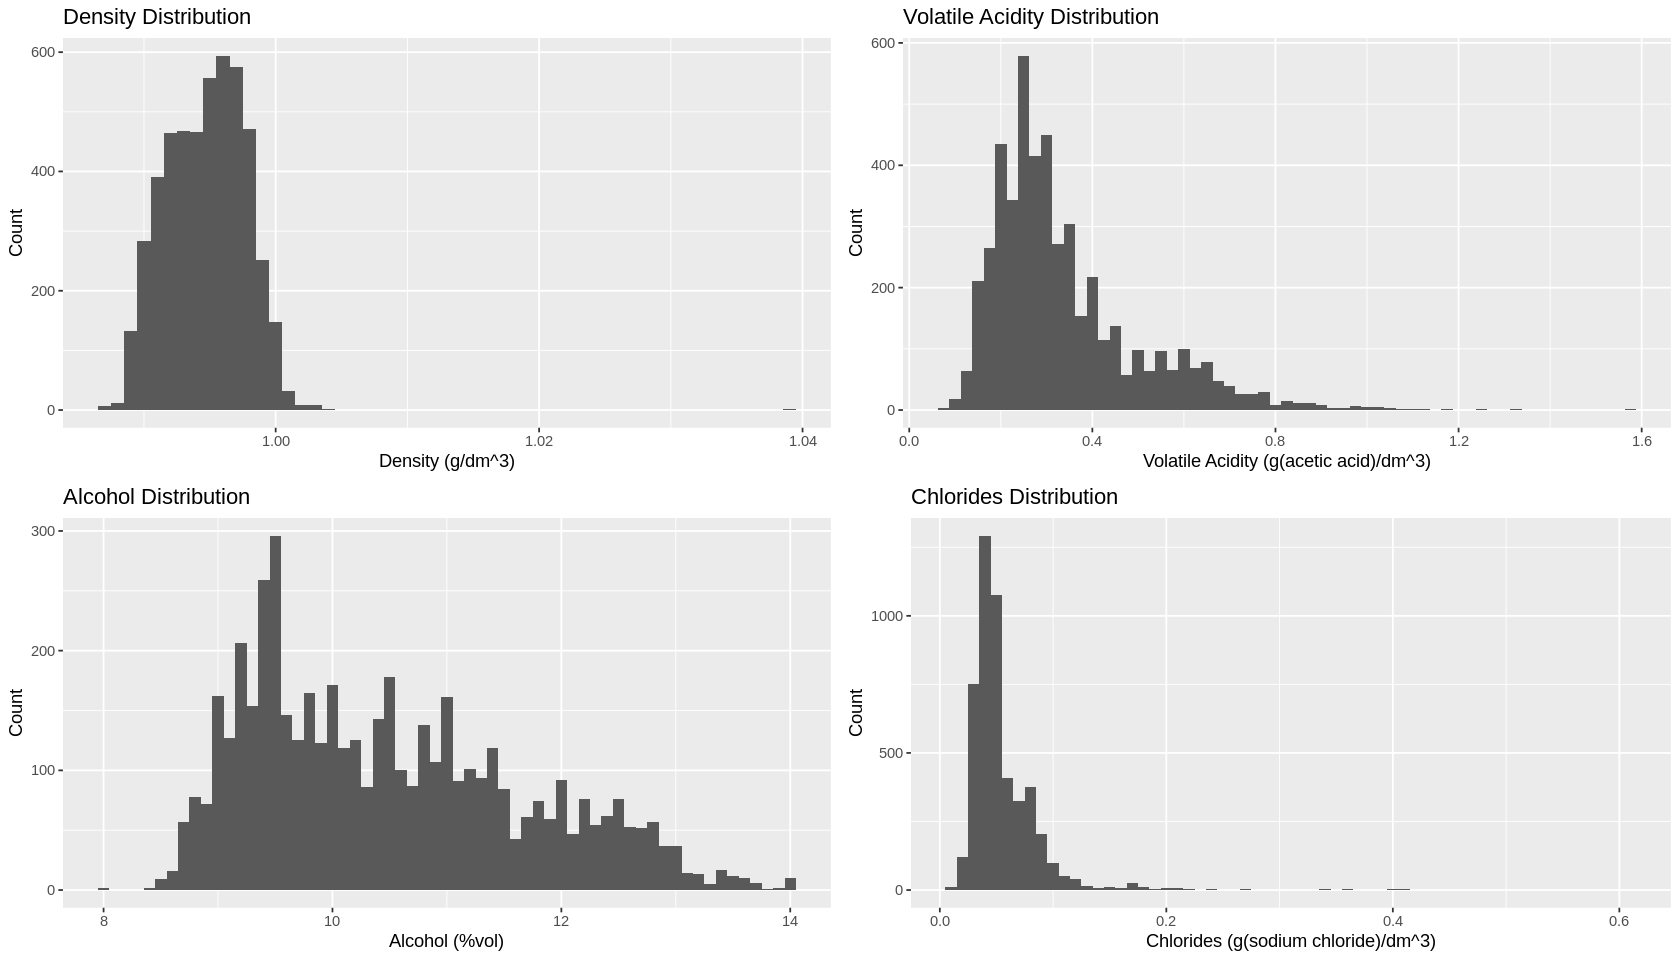

In [8]:
#setting plot size
options(repr.plot.width = 14, repr.plot.height = 8)

#create plot for each predictor and their distribution
density_plot <- predictors %>% ggplot(aes(x = density)) +
    geom_histogram(binwidth = .001)+
    xlab("Density (g/dm^3)")+
    ylab("Count")+
    ggtitle("Density Distribution")

chlorides_plot <- predictors %>% ggplot(aes(x = chlorides)) +
    geom_histogram(binwidth = .01)+
    xlab("Chlorides (g(sodium chloride)/dm^3)")+
    ylab("Count")+
    ggtitle("Chlorides Distribution")

volatile_acidity_plot <- predictors %>% ggplot(aes(x = volatile_acidity)) +
    geom_histogram(binwidth = .025)+
    xlab("Volatile Acidity (g(acetic acid)/dm^3)")+
    ylab("Count")+
    ggtitle("Volatile Acidity Distribution")

alcohol_plot <- predictors %>% ggplot(aes(x = alcohol)) +
    geom_histogram(binwidth = .1)+
    xlab("Alcohol (%vol)")+
    ylab("Count")+
    ggtitle("Alcohol Distribution")

#create grid of above plots for comparison
predictor_distribution <- plot_grid(density_plot, volatile_acidity_plot, alcohol_plot, chlorides_plot )
predictor_distribution

<font size="3">**Methods**</font>

Given that the response variable (wine quality based on subjective sensory data) is quantitative, we will use **regression** for our predictions. All of the other variables in this dataset appear to have the potential to affect the taste and/or smell of wine. Therefore, to begin our analysis, we have visualized each of the predictor variables as scatter plots with the predictor variable on the x-axis and wine quality on the y-axis.

First, we created scatterplots to assess the relationships between each of the potential predictor variables and wine quality and assembled them into a grid. Meanwhile, we also calculated the correlations between each predictor variable and wine quality.

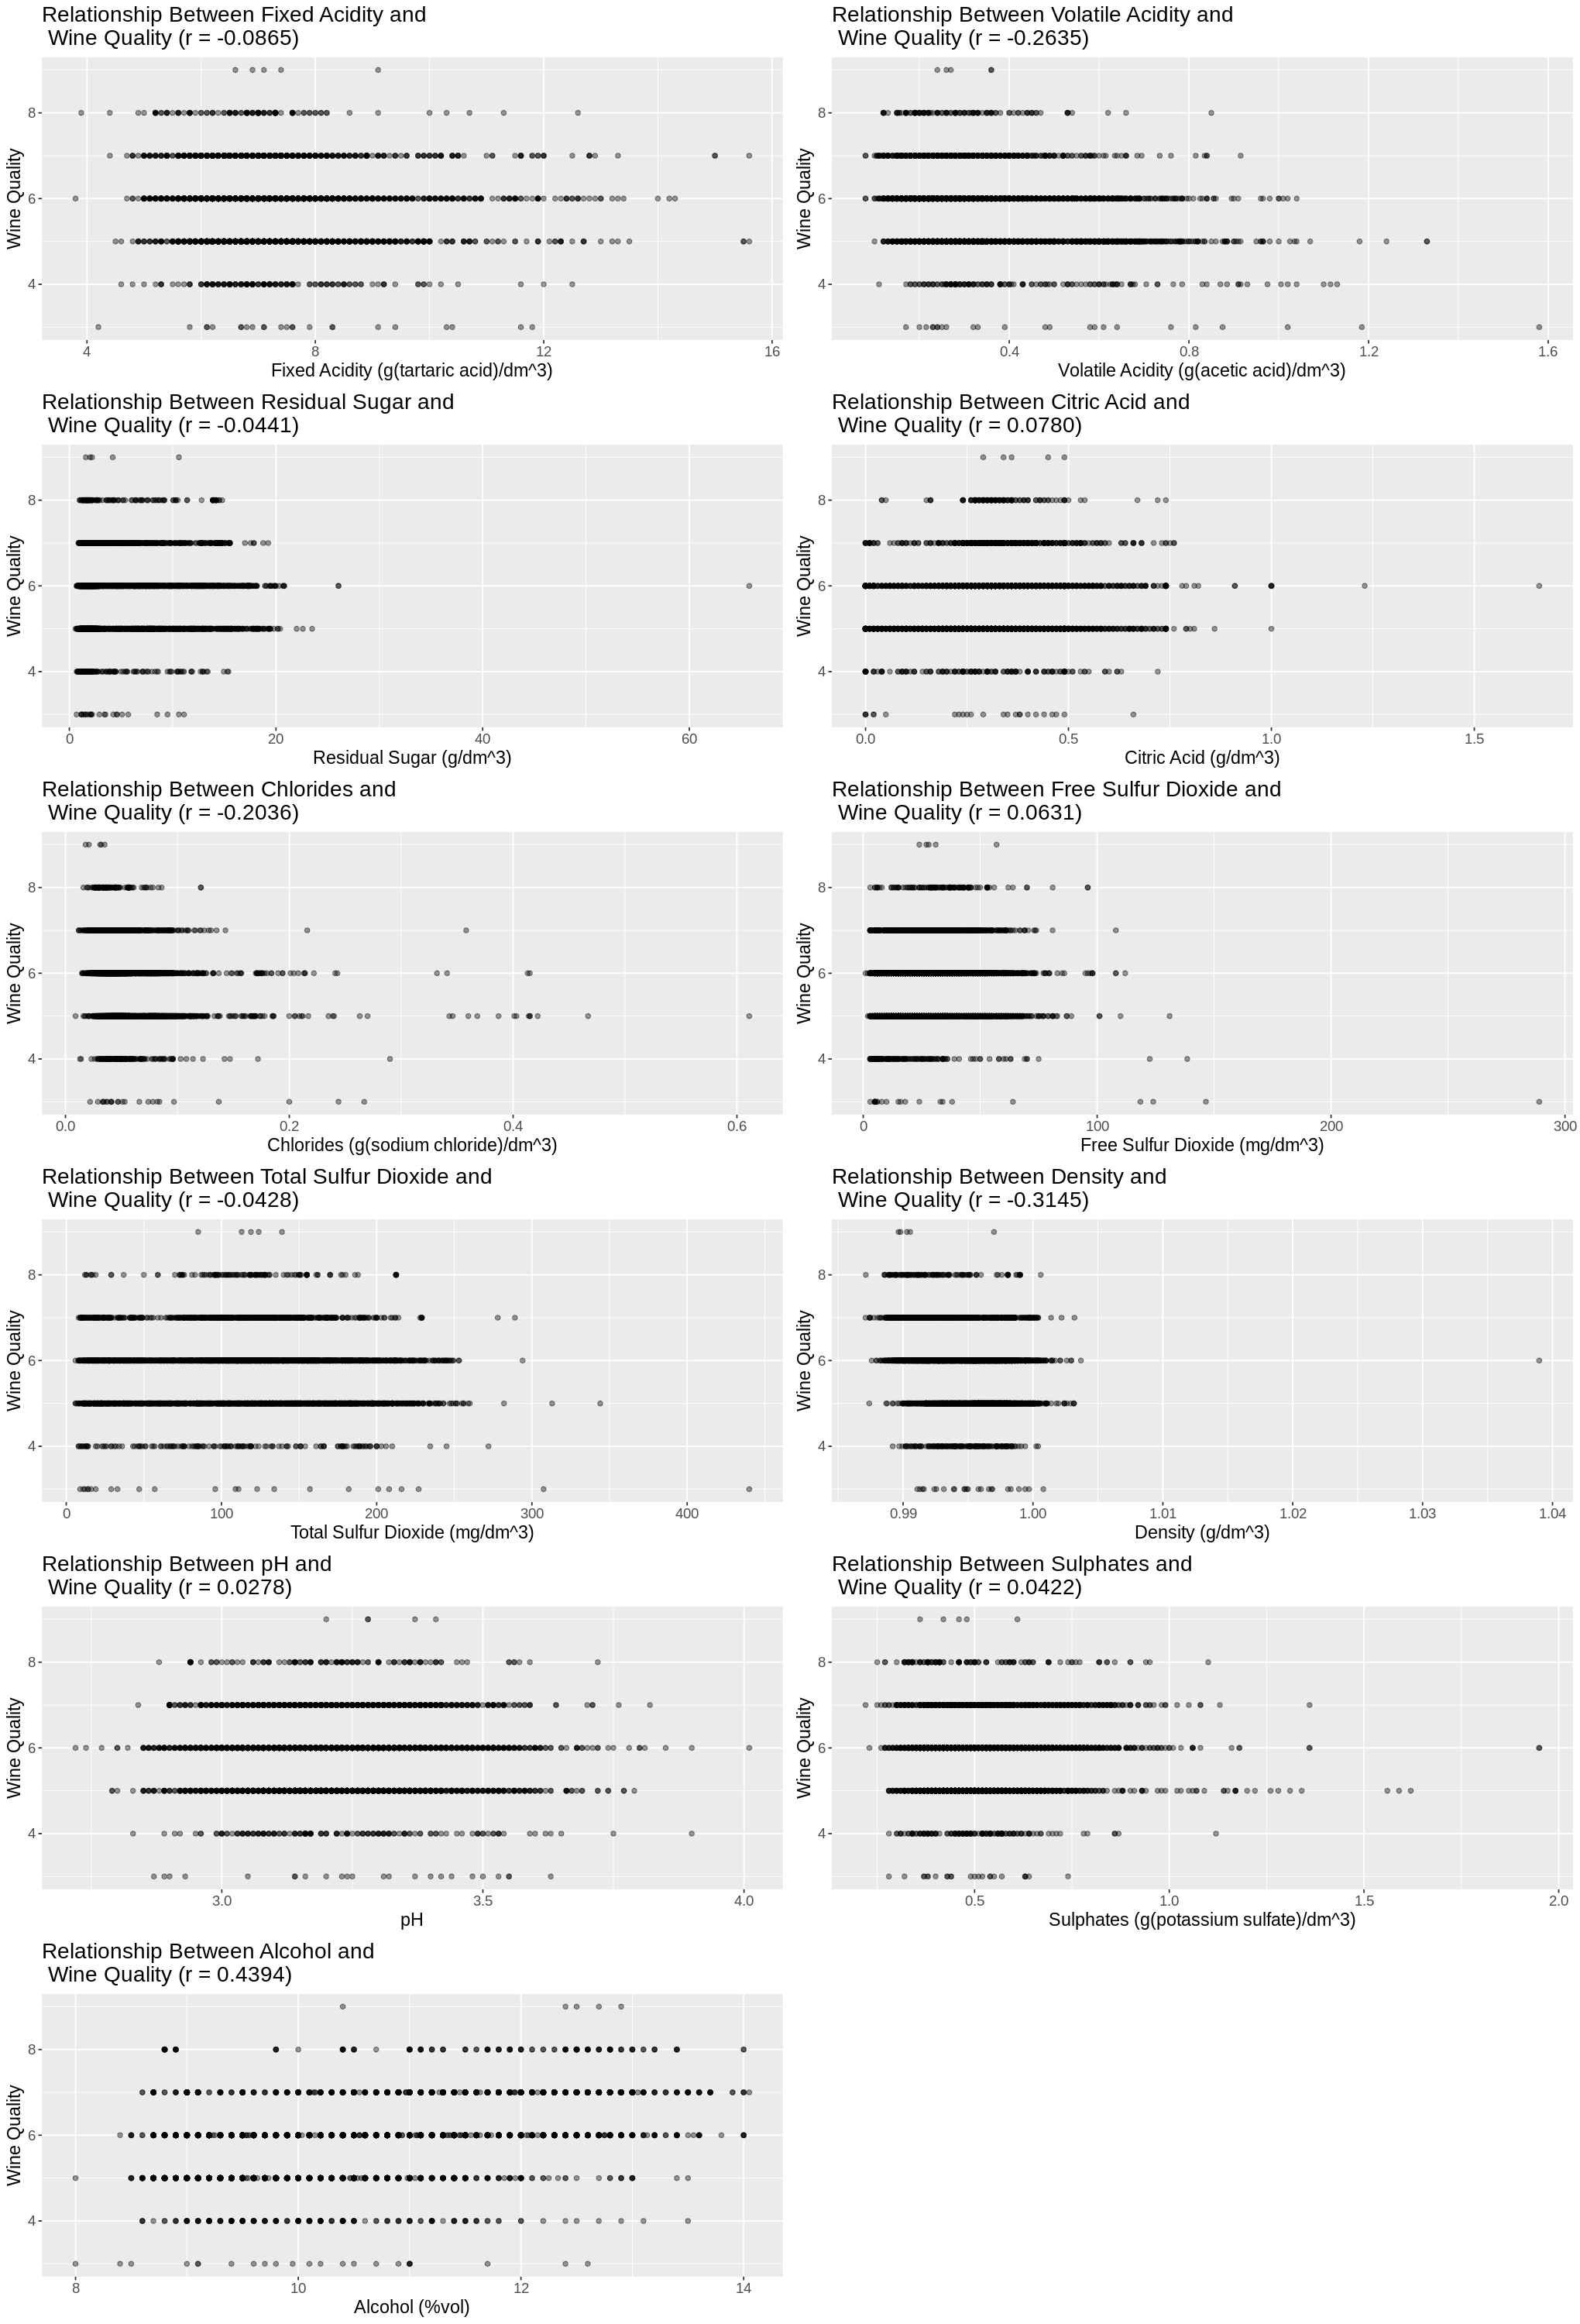

In [9]:
options(repr.plot.width = 17, repr.plot.height = 25)

#create scatterplot of fixed acidity vs wine quality
fixed_acidity_scatter <- ggplot(wine_training, aes(x = fixed_acidity, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Fixed Acidity (g(tartaric acid)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Fixed Acidity and \n Wine Quality (r = -0.0865)")

#find correlation between fixed acidity and wine quality
PearsonCorrelation_Fixed_Acidity <- cor(wine_training$fixed_acidity, wine_training$quality, method = c("pearson"))

#create scatterplot of volatile acidity vs wine quality
volatile_acidity_scatter <- ggplot(wine_training, aes(x = volatile_acidity , y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Volatile Acidity (g(acetic acid)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Volatile Acidity and \n Wine Quality (r = -0.2635)")

#find correlation between volatile acidity and wine quality
PearsonCorrelation_Volatile_Acidity <- cor(wine_training$volatile_acidity, wine_training$quality, method = c("pearson"))


#create scatterplot of residual sugar vs wine quality
residual_sugar_scatter <- ggplot(wine_training, aes(x = residual_sugar, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Residual Sugar (g/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Residual Sugar and \n Wine Quality (r = -0.0441)")

#find correlation between residual sugar and wine quality
PearsonCorrelation_Residual_Sugar <- cor(wine_training$residual_sugar, wine_training$quality, method = c("pearson"))

#create scatterplot of citric acid vs wine quality
citric_acid_scatter <- ggplot(wine_training, aes(x = citric_acid, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Citric Acid (g/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Citric Acid and \n Wine Quality (r = 0.0780)")

#find correlation between citric acid and wine quality
PearsonCorrelation_Citric_Acid <- cor(wine_training$citric_acid, wine_training$quality, method = c("pearson"))

#create scatterplot of chlorides vs wine quality
chlorides_scatter <- ggplot(wine_training, aes(x = chlorides, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Chlorides (g(sodium chloride)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Chlorides and \n Wine Quality (r = -0.2036)")

#find correlation between chlorides and wine quality
PearsonCorrelation_Chlorides <- cor(wine_training$chlorides, wine_training$quality, method = c("pearson"))

#create scatterplot of free sulfur dioxide vs wine quality
free_sulfur_dioxide_scatter <- ggplot(wine_training, aes(x = free_sulfur_dioxide, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Free Sulfur Dioxide (mg/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Free Sulfur Dioxide and \n Wine Quality (r = 0.0631)")

#find correlation between free sulfur dioxide and wine quality
PearsonCorrelation_Free_Sulfur_Dioxide <- cor(wine_training$free_sulfur_dioxide, wine_training$quality, method = c("pearson"))

#create scatterplot of total sulfur dioxide vs wine quality
total_sulfur_dioxide_scatter <- ggplot(wine_training, aes(x = total_sulfur_dioxide, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Total Sulfur Dioxide (mg/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Total Sulfur Dioxide and \n Wine Quality (r = -0.0428)")

#find correlation between total sulfur dioxide and wine quality
PearsonCorrelation_Total_Sulfur_Dioxide <- cor(wine_training$total_sulfur_dioxide, wine_training$quality, method = c("pearson"))

#create scatterplot of density vs wine quality
density_scatter <- ggplot(wine_training, aes(x = density, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Density (g/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Density and \n Wine Quality (r = -0.3145)")

#find correlation between density and wine quality
PearsonCorrelation_Density <- cor(wine_training$density, wine_training$quality, method = c("pearson"))

#create scatterplot of pH vs wine quality
pH_scatter <- ggplot(wine_training, aes(x = pH, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("pH") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between pH and \n Wine Quality (r = 0.0278)")

#find correlation between pH and wine quality
PearsonCorrelation_pH <- cor(wine_training$pH, wine_training$quality, method = c("pearson"))

#create scatterplot of sulphates vs wine quality
sulphates_scatter <- ggplot(wine_training, aes(x = sulphates, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Sulphates (g(potassium sulfate)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Sulphates and \n Wine Quality (r = 0.0422)")

#find correlation between sulphates and wine quality
PearsonCorrelation_Sulphates <- cor(wine_training$sulphates, wine_training$quality, method = c("pearson"))

#create scatterplot of alcohol vs wine quality
alcohol_scatter <- ggplot(wine_training, aes(x = alcohol, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Alcohol (%vol)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Alcohol and \n Wine Quality (r = 0.4394)")

#find correlation between alcohol and wine quality
PearsonCorrelation_Alcohol <- cor(wine_training$alcohol, wine_training$quality, method = c("pearson"))

#setting plot size
options(repr.plot.width = 17, repr.plot.height = 25)

#creates grid of predictor variable vs wine quality scatterplots 
grid <- plot_grid(fixed_acidity_scatter, volatile_acidity_scatter, residual_sugar_scatter, citric_acid_scatter, chlorides_scatter, free_sulfur_dioxide_scatter, total_sulfur_dioxide_scatter, density_scatter, pH_scatter, sulphates_scatter, alcohol_scatter, ncol = 2)
grid

We can see that alcohol, density, chlorides, and volatile acidity are weakly-to-moderately correlated with wine quality; therefore, we will use these variables for our models. In order to conduct our data analysis, we will first use a multivariate K-nearest neighbors-based approach and perform cross-validation to determine at which value of K the minimum RMSPE occurs. Using this K value, we will re-train our KNN regression model and then make predictions on the testing data set. The RMSPE will let us evaluate our model's accuracy. We will also use a multiple linear regression approach to calculate the line of best fit, including the intercept and slope coefficients, and we will evaluate any outliers. We will again compute the RMSPE. We will choose the model with the least bias (i.e., the lower RMSPE). If the linear regression model is the better fit, we will visualise our data using a flat plane; otherwise, we will use a flexible plane.

<font size="3">**Expected Outcomes and Significance**</font>

Through our linear multiple regression analysis, we expect to get a fitted linear equation with an intercept and slope coefficients that we can use to get a predicted value of wine quality when we know the values of certain correlated variables. Through our KNN regression analysis, we will be able to get a predicted value of wine quality by examining the values of certain correlated variables that a particular sample of wine possesses and finding the nearest neighbours of those datapoints. Through our findings, we expect to be able to significantly predict subjective assessments of wine quality by collecting data about a wine sample's physicochemical properties (alcohol, density, chlorides, and volatile acidity).

This data analysis simplifies the traditional wine certification phase. Besides wine, this type of analysis can also be applied to other liquids. For example, how do glucose, caffeine, electrolytes, and amino acids predict the quality of sports drinks?

<font size ="3">**Linear Regression Analysis**</font>

First, we create the model specification for our multivariable linear regression model by using the linear_reg model specification with the lm engine. We also use set_mode("regression") in the model specification to indicate that this is a regression problem.

In [10]:
#create the model specification for linear regression
mlm_spec <- linear_reg() %>%
set_engine("lm") %>%
set_mode("regression")
mlm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


Next, we create the recipe for our multivariable linear regression analysis by specifying that we want to predict our target variable, the quality of the wine, based on the density, volatile acidity, chlorides, and alcohol, which are all the predictor variables that have the strongest correlation to wine quality. We are also initializing this recipe for the training dataset wine_training.

In [13]:
#create the recipe for linear regression
mlm_recipe <- recipe(quality ~ density + volatile_acidity + chlorides + alcohol, data = wine_training)
mlm_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

In this next step, we 

In [11]:
mlm_fit <- workflow() %>%
add_recipe(mlm_recipe) %>%
add_model(mlm_spec) %>%
fit(data = wine_training)
mlm_fit

lm_mult_test_results <- mlm_fit %>%
predict(wine_testing) %>%
bind_cols(wine_testing) %>%
metrics(truth = quality, estimate = .pred)
lm_mult_test_results

mcoeffs <- mlm_fit %>%
pull_workflow_fit %>%
tidy()
mcoeffs

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)           density  volatile_acidity         chlorides  
        -38.4625           41.0445           -1.4513           -0.2499  
         alcohol  
          0.3777  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.7509942
rsq,standard,0.2934072
mae,standard,0.5781999


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-38.4625329,5.27882380,-7.2861937,3.700907e-13
density,41.0444972,5.22608492,7.8537754,4.930794e-15
volatile_acidity,-1.4512967,0.07237952,-20.0512059,5.370117e-86
chlorides,-0.2498676,0.34979097,-0.7143341,4.750549e-01
alcohol,0.3776836,0.01258502,30.0105570,1.048938e-181


<font size="3">**Bibliography**</font>

Nebot, À., Mugica, F., & Escobet, A. (2015, July). Modeling Wine Preferences from Physicochemical Properties using Fuzzy Techniques. In *SIMULTECH* (pp. 501-507).